In [1]:
# package to clean text
import nltk; nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

# packages to store and manipulate data
import numpy as np
import pandas as pd
from pprint import pprint

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")

# plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\607791\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import Dataset
df = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum/billboard_lyrics_1964-2015.csv')
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,NaN,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [3]:
df.shape

(5100, 6)

In [4]:
df=df.drop(['Source'], axis=1)
df=df.dropna()
df.shape

(4866, 5)

In [5]:
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


In [6]:
# clean text function
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # pronouns stay, rest lemmatized
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into doc
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords + ['use', 'make', 'see', 'how', 'go', 'say', 'ask', 'get'])

In [8]:
import string
# list

data = df.Lyrics.values.tolist()

data = clean_text(data)

removing punctuation and digits
spacy nlp...
getting lemmas
removing stopwords


In [9]:
import re
# remove http links
data = [re.sub('http://\S+', '', sent) for sent in data]

# remove https links
data = [re.sub('https://\S+', '', sent) for sent in data]

# remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

clean_lyric = data

<>:3: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \S
<>:3: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \S
<>:3: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \S
<ipython-input-9-26ff564adbef>:3: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('http://\S+', '', sent) for sent in data]
<ipython-input-9-26ff564adbef>:6: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('https://\S+', '', sent) for sent in data]
<ipython-input-9-26ff564adbef>:9: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
lyr_words = list(sent_to_words(data))

In [11]:
# bigram and trigram models
bigram = gensim.models.Phrases(lyr_words, min_count=8, threshold=100)
trigram = gensim.models.Phrases(bigram[lyr_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# output test
print(trigram_mod[bigram_mod[lyr_words[0]]])

['sam', 'sham', 'miscellaneous', 'wooly_bully_wooly_bully', 'sam', 'sham', 'pharaohs', 'domingo', 'samudio', 'uno', 'dos', 'one', 'two', 'tre', 'quatro', 'matty', 'tell', 'hatty', 'thing', 'two', 'big', 'horn', 'wooly', 'jaw', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'hatty', 'tell', 'matty', 'let', 'take', 'chance', 'let', 'belseven', 'come', 'learn', 'dance', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'matty', 'tell', 'hatty', 'thing', 'someone', 'really', 'pull', 'wool', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'lseven', 'letter', 'number', 'type', 'form', 'rough', 'square', 'lyric', 'mean', 'let', 'square']


In [12]:
"""https://spacy.io/api/annotation"""

def bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [13]:
# bigrams
lyr_bigrams = bigrams(lyr_words)
lyr_bigrams
# lemmatization
lyr_lemmatized = lemmatization(lyr_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lyr_lemmatized[:1])

[['miscellaneous', 'wooly_bully', 'wooly_bully', 'tell', 'thing', 'big', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'hatty', 'let', 'take', 'chance', 'let', 'come', 'learn', 'dance', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'matty', 'tell', 'thing', 'really', 'pull', 'wool', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'lseven', 'letter', 'number', 'type', 'form', 'rough', 'square', 'lyric', 'mean', 'let', 'square']]


In [14]:
# Dictionary
id2word = corpora.Dictionary(lyr_lemmatized)
# Corpus
texts = lyr_lemmatized
# lyric term frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [15]:
# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=10,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [16]:
from pprint import pprint
# Topics key words
pprint(lda_model.print_topics())
lda = lda_model[corpus]

[(0,
  '0.114*"come" + 0.052*"bad" + 0.044*"shake" + 0.040*"move" + 0.032*"hit" + '
  '0.026*"roll" + 0.025*"ride" + 0.021*"name" + 0.018*"show" + 0.016*"right"'),
 (1,
  '0.053*"know" + 0.052*"love" + 0.032*"baby" + 0.027*"want" + 0.020*"feel" + '
  '0.020*"time" + 0.020*"never" + 0.018*"tell" + 0.018*"would" + '
  '0.016*"think"'),
 (2,
  '0.025*"put" + 0.023*"money" + 0.023*"bitch" + 0.023*"little" + 0.019*"man" '
  '+ 0.016*"cause" + 0.015*"hand" + 0.015*"look" + 0.014*"watch" + '
  '0.013*"work"'),
 (3,
  '0.209*"girl" + 0.064*"boy" + 0.032*"talk" + 0.024*"bout" + 0.021*"fine" + '
  '0.020*"catch" + 0.019*"lady" + 0.019*"round" + 0.014*"drive" + 0.014*"gon"'),
 (4,
  '0.098*"take" + 0.068*"back" + 0.036*"away" + 0.032*"leave" + 0.028*"head" + '
  '0.026*"home" + 0.023*"bring" + 0.020*"stand" + 0.018*"walk" + 0.017*"burn"'),
 (5,
  '0.174*"let" + 0.073*"night" + 0.053*"tonight" + 0.045*"stop" + 0.040*"body" '
  '+ 0.040*"keep" + 0.036*"dance" + 0.029*"play" + 0.018*"first" + '
  '0

In [17]:
# Perplexity measures the model with lower scores being the goal and a sign of a good model
print('Perplexity: ', lda_model.log_perplexity(corpus))

# Coherence measures the proposed topics distinguishability
coherence_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence = coherence_lda.get_coherence()
print('Coherence: ', coherence)

Perplexity:  -7.121042782942125
Coherence:  0.37927268713052614


In [18]:
for i in range(len(lyr_lemmatized)):
    lyr_lemmatized[i] = ' '.join(lyr_lemmatized[i])
    
df['clean'] = lyr_lemmatized
df.head()

,Rank,Song,Artist,Year,Lyrics,clean
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,miscellaneous wooly_bully wooly_bully tell thi...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,sugar honey bunch know love help love elsein l...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,wake morning mind mind trouble worry corner ea...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,never close eye anymore kiss lip tenderness fi...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,alone life lonely always downtown worry noise ...


In [19]:
import pyLDAvis
import pyLDAvis.gensim 

# Topic Visualization
pyLDAvis.enable_notebook()
distance_map = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
distance_map

C:\Users\607791\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.292863  0.010008       1        1  53.620338
2     -0.238618 -0.064449       2        1  15.137651
4     -0.058603 -0.259835       3        1   9.815252
5     -0.031231  0.271695       4        1   7.022223
0      0.069506  0.222508       5        1   6.384937
3      0.138488 -0.058077       6        1   5.102785
6      0.221065 -0.110584       7        1   2.720439
7      0.192256 -0.011266       8        1   0.196373, topic_info=      Category          Freq             Term         Total  loglift  logprob
7      Default   6721.000000              let   6721.000000  30.0000  30.0000
40     Default   5303.000000             girl   5303.000000  29.0000  29.0000
2      Default   5903.000000             come   5903.000000  28.0000  28.0000
19     Default   5695.000000             take   5695.000000  27.0000  27.0000
332    Default   3566.000000             good   3566.000000  26.0000  26.0000
48     Default  13808.000000             love  13808.000000  25.0000  25.0000
141    Default   3455.000000            night   3455.000000  24.0000  24.0000
81     Default   3320.000000             back   3320.000000  23.0000  23.0000
684    Default   2368.000000             turn   2368.000000  22.0000  22.0000
333    Default   3242.000000             keep   3242.000000  21.0000  21.0000
45     Default  14475.000000             know  14475.000000  20.0000  20.0000
1037   Default   1519.000000             real   1519.000000  19.0000  19.0000
150    Default   1845.000000          tonight   1845.000000  18.0000  18.0000
474    Default   1620.000000              boy   1620.000000  17.0000  17.0000
296    Default   1653.000000              run   1653.000000  16.0000  16.0000
46     Default   2449.000000            leave   2449.000000  15.0000  15.0000
507    Default   1642.000000              bad   1642.000000  14.0000  14.0000
65     Default   1875.000000             away   1875.000000  13.0000  13.0000
352    Default   1577.000000             stop   1577.000000  12.0000  12.0000
509    Default   1395.000000            shake   1395.000000  11.0000  11.0000
473    Default   1395.000000             body   1395.000000  10.0000  10.0000
73     Default   1309.000000             move   1309.000000   9.0000   9.0000
185    Default   2016.000000              put   2016.000000   8.0000   8.0000
461    Default   3372.000000            right   3372.000000   7.0000   7.0000
80     Default   8678.000000             baby   8678.000000   6.0000   6.0000
91     Default   5710.000000             feel   5710.000000   5.0000   5.0000
3      Default   1274.000000            dance   1274.000000   4.0000   4.0000
1144   Default    922.000000              hot    922.000000   3.0000   3.0000
104    Default   5310.000000            never   5310.000000   2.0000   2.0000
221    Default   1711.000000            money   1711.000000   1.0000   1.0000
...        ...           ...              ...           ...      ...      ...
3802    Topic8     22.541739             pink     23.222382   6.2032  -3.7678
8693    Topic8     19.310244            pedal     19.991003   6.1983  -3.9226
2894    Topic8     17.685278             glow     18.366798   6.1951  -4.0105
3096    Topic8     15.910481           burnin     16.590065   6.1911  -4.1162
1734    Topic8     14.995925          weather     15.676023   6.1886  -4.1754
3384    Topic8     14.857680            hotel     15.537783   6.1881  -4.1847
3032    Topic8     14.216585        hypnotize     14.895906   6.1862  -4.2288
1477    Topic8     10.755686         magazine     11.437388   6.1715  -4.5078
600     Topic8      7.984892         eternity      8.664700   6.1512  -4.8056
4933    Topic8      5.920621            sixth      6.616277   6.1218  -5.1047
3300    Topic8      5.785252             lace      6.465355   6.1218  -5.1279
3033    Topic8      4.209124          sparkle      4.889727   6

In [20]:
# get topics for each song
topics = lda_model.get_document_topics(corpus, per_word_topics=True)
all_topics = [(doc_topics, word_topics, word_phis) for doc_topics, word_topics, word_phis in topics]
all_topics

[([(0, 0.032717925),
   (1, 0.47139248),
   (2, 0.10532863),
   (3, 0.017677866),
   (4, 0.085732654),
   (5, 0.13120094),
   (6, 0.15495464)],
  [(0, [2, 0]),
   (1, [1, 4]),
   (2, [1, 0, 4]),
   (3, [5]),
   (4, [1]),
   (5, [6]),
   (6, [1]),
   (7, [5, 1]),
   (8, [1]),
   (9, [6]),
   (10, [6]),
   (11, [6]),
   (12, [1]),
   (13, [1]),
   (14, [6]),
   (15, [4]),
   (16, [1]),
   (17, [6]),
   (18, [6]),
   (19, [4, 1]),
   (20, [1, 2]),
   (21, [1, 0]),
   (22, [2]),
   (23, [2, 6, 4]),
   (24, [6, 5, 1, 4, 2, 0])],
  [(0, [(0, 0.010497619), (2, 0.98939985)]),
   (1, [(1, 0.9770955), (4, 0.022727642)]),
   (2, [(0, 0.37261635), (1, 0.61708623), (4, 0.010278108)]),
   (3, [(5, 0.999972)]),
   (4, [(1, 0.9980842)]),
   (5, [(6, 0.014078057)]),
   (6, [(1, 0.99980044)]),
   (7, [(1, 0.15890454), (5, 2.8410788)]),
   (8, [(1, 0.9986226)]),
   (9, [(6, 0.014078057)]),
   (10, [(6, 0.999465)]),
   (11, [(6, 0.01429543)]),
   (12, [(1, 0.9999532)]),
   (13, [(1, 0.99203354)]),
   (14,

In [21]:
# pull out just the topics from the get_document_topics function
def Extract(all_topics): 
    return [doc[0] for doc in all_topics] 

In [22]:
# pull out just the topics from the get_document_topics function
# each bracket is a sublist of the score each topic has
all_doc_topics = Extract(all_topics)
df['all_doc_topics'] = Extract(all_doc_topics)
df.head()
all_doc_topics

[[(0, 0.032717925),
  (1, 0.47139248),
  (2, 0.10532863),
  (3, 0.017677866),
  (4, 0.085732654),
  (5, 0.13120094),
  (6, 0.15495464)],
 [(0, 0.013364579),
  (1, 0.66485596),
  (2, 0.043251365),
  (3, 0.028619295),
  (4, 0.2331004),
  (5, 0.011727429)],
 [(0, 0.1403654),
  (1, 0.56956357),
  (2, 0.042842552),
  (3, 0.01713447),
  (4, 0.17533676),
  (5, 0.045184843)],
 [(1, 0.63988036),
  (2, 0.026075965),
  (3, 0.064311944),
  (4, 0.24709137),
  (5, 0.012529179)],
 [(1, 0.57146466),
  (2, 0.32304016),
  (3, 0.019939495),
  (4, 0.022853227),
  (5, 0.051749635)],
 [(1, 0.56727034), (2, 0.062922515), (3, 0.23176049), (4, 0.11688129)],
 [(0, 0.032731656),
  (1, 0.6674209),
  (2, 0.09829019),
  (4, 0.029848654),
  (5, 0.029080858),
  (6, 0.13324773)],
 [(0, 0.035245176),
  (1, 0.8827398),
  (2, 0.03152832),
  (3, 0.01039417),
  (4, 0.020990148),
  (5, 0.013186928)],
 [(0, 0.017503463),
  (1, 0.38429734),
  (2, 0.086856276),
  (3, 0.45698637),
  (4, 0.03587372),
  (5, 0.012858823)],
 [(0, 0

In [23]:
# sorting sublist to pull the top topic to the front of each sublist
for sublist in all_doc_topics: 
    sublist.sort(key = lambda x: x[1],reverse=1) 
    
all_doc_topics

[[(1, 0.47139248),
  (6, 0.15495464),
  (5, 0.13120094),
  (2, 0.10532863),
  (4, 0.085732654),
  (0, 0.032717925),
  (3, 0.017677866)],
 [(1, 0.66485596),
  (4, 0.2331004),
  (2, 0.043251365),
  (3, 0.028619295),
  (0, 0.013364579),
  (5, 0.011727429)],
 [(1, 0.56956357),
  (4, 0.17533676),
  (0, 0.1403654),
  (5, 0.045184843),
  (2, 0.042842552),
  (3, 0.01713447)],
 [(1, 0.63988036),
  (4, 0.24709137),
  (3, 0.064311944),
  (2, 0.026075965),
  (5, 0.012529179)],
 [(1, 0.57146466),
  (2, 0.32304016),
  (5, 0.051749635),
  (4, 0.022853227),
  (3, 0.019939495)],
 [(1, 0.56727034), (3, 0.23176049), (4, 0.11688129), (2, 0.062922515)],
 [(1, 0.6674209),
  (6, 0.13324773),
  (2, 0.09829019),
  (0, 0.032731656),
  (4, 0.029848654),
  (5, 0.029080858)],
 [(1, 0.8827398),
  (0, 0.035245176),
  (2, 0.03152832),
  (4, 0.020990148),
  (5, 0.013186928),
  (3, 0.01039417)],
 [(3, 0.45698637),
  (1, 0.38429734),
  (2, 0.086856276),
  (4, 0.03587372),
  (0, 0.017503463),
  (5, 0.012858823)],
 [(1, 0

In [24]:
# extract the top topic and add it to the data
def topic(all_doc_topics): 
    to_sort = [[item[1],item[0]] for item in all_doc_topics]
    to_sort.sort(reverse=1)
    max_value,max_topic = to_sort[0][0],to_sort[0][1]
    return [doc[0] for doc in all_doc_topics]

topics = topic(all_doc_topics)

df['topic'] = topics
df.head()

,Rank,Song,Artist,Year,Lyrics,clean,all_doc_topics,topic
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,miscellaneous wooly_bully wooly_bully tell thi...,"(0, 0.032717925)","(1, 0.47139248)"
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,sugar honey bunch know love help love elsein l...,"(0, 0.013364579)","(1, 0.66485596)"
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,wake morning mind mind trouble worry corner ea...,"(0, 0.1403654)","(1, 0.56956357)"
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,never close eye anymore kiss lip tenderness fi...,"(1, 0.63988036)","(1, 0.63988036)"
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,alone life lonely always downtown worry noise ...,"(1, 0.57146466)","(1, 0.57146466)"


In [25]:
# separate the topics from their values and capture both
topic_num = [item[0] for item in topics]
df['topic'] = topic_num

topic_value = [item[1] for item in topics]
df['topic_value'] = topic_value

df.head()

,Rank,Song,Artist,Year,Lyrics,clean,all_doc_topics,topic,topic_value
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,miscellaneous wooly_bully wooly_bully tell thi...,"(0, 0.032717925)",1,0.471392
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,sugar honey bunch know love help love elsein l...,"(0, 0.013364579)",1,0.664856
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,wake morning mind mind trouble worry corner ea...,"(0, 0.1403654)",1,0.569564
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,never close eye anymore kiss lip tenderness fi...,"(1, 0.63988036)",1,0.639880
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,alone life lonely always downtown worry noise ...,"(1, 0.57146466)",1,0.571465


In [26]:
train_vector = []
for i in range(len(data)):
    top_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(5)]
    train_vector.append(topic_vec)

In [27]:
train_vector

[[0.03271638, 0.47139394, 0.10532866, 0.017677866, 0.08573263],
 [0.013363965, 0.66485894, 0.04324953, 0.028618993, 0.23310019],
 [0.14036642, 0.5695629, 0.042842552, 0.017134473, 0.17533644],
 [0.006712489, 0.63988245, 0.026075948, 0.06430864, 0.24709266],
 [0.0073900986, 0.5714652, 0.32304022, 0.01993948, 0.022852633],
 [0.0077620717, 0.5672768, 0.06292497, 0.2317531, 0.11687982],
 [0.03273161, 0.6674244, 0.09829098, 0.008947092, 0.029848073],
 [0.035245005, 0.8827408, 0.031527568, 0.010394168, 0.02099013],
 [0.017503392, 0.3842973, 0.08685635, 0.45698637, 0.03587372],
 [0.02197426, 0.532383, 0.053096283, 0.29359812, 0.06415285],
 [0.034220576, 0.20752175, 0.39602187, 0.0102203945, 0.0358417],
 [0.20147015, 0.538633, 0.07926498, 0.010916918, 0.0412825],
 [0.00909111, 0.80690444, 0.022469759, 0.027825003, 0.06462823],
 [0.01858877, 0.24144283, 0.5018109, 0.085682325, 0.033940855],
 [0.0133207105, 0.51731116, 0.3068503, 0.022163142, 0.036061794],
 [0.017480535, 0.8424499, 0.047122724, 

In [29]:
# classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import metrics
#logistic regression to label unseen data with topics
X = np.array(train_vector)
y = np.array(topic_num)

# kfold to split data with 1/6th for validation
kf = KFold(6, shuffle=True, random_state=10)
log_reg = []

for train, valid in kf.split(X, y):
    X_train, y_train = X[train], y[train]
    X_valid, y_valid = X[valid], y[valid]
    
    scaler = StandardScaler()
    X_trainS = scaler.fit_transform(X_train)
    X_valS = scaler.transform(X_valid)

    # logisitic regression model
    logreg_model = LogisticRegression(class_weight= 'balanced',solver='newton-cg',fit_intercept=True).fit(X_trainS, y_train)

    logreg_y_predict = logreg_model.predict(X_valS)
    log_reg.append(f1_score(y_valid, logreg_y_predict, average=None))

C:\Users\607791\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\607791\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\607791\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\607791\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\607791\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search f

In [30]:
# logistic regression result with 1.0 being 100% success and a standard deviation
print(f'Logistic Regression Result: {np.mean(log_reg):.3f} +- {np.std(log_reg):.3f}')

Logistic Regression Result: 0.673 +- 0.323


In [32]:
import scipy
corpus_umap = gensim.matutils.corpus2csc(corpus).T
# normalize by row
corpus_umap = corpus_umap.multiply(scipy.sparse.csr_matrix(1/np.sqrt(corpus_umap.multiply(corpus_umap).sum(1))))
# double check the norms
np.sum(np.abs(corpus_umap.multiply(corpus_umap).sum(1) - 1) > 0.001)

C:\Users\607791\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


18

In [33]:
# dimension Reduction using UMAP
import umap.umap_ as umap
reducer = umap.UMAP()
#%%time
embedding = umap.UMAP(metric="cosine", n_components=2).fit_transform(corpus_umap)

C:\Users\607791\Anaconda\lib\site-packages\umap\sparse.py:247: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "Anaconda\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\Users\607791\Anaconda\lib\site-packages\numba\compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "Anaconda\lib\site-packages\umap\sparse.py", line 176:
    @numb

In [34]:
def get_model_results(ldamodel, corpus, id2word):
    vis = pyLDAvis.gensim.prepare(ldamodel, corpus, id2word, sort_topics=False)
    transformed = ldamodel.get_document_topics(corpus)
    df = pd.DataFrame.from_records([{v:k for v, k in row} for row in transformed])
    return vis, df  

In [37]:
lda_vis, lda_result  = get_model_results(lda_model, corpus, id2word)

C:\Users\607791\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [38]:
lda_article = df[['Song', 'clean', 'topic']]

In [39]:
df_emb = pd.DataFrame(embedding, columns=["x", "y"])
df_emb.head()

,x,y
0,9.704038,7.499792
1,9.719745,7.163137
2,9.354245,3.819887
3,13.512748,4.464624
4,12.846412,6.032652


In [43]:
df_emb["label"] = df[['topic']]
df_emb.head()
df_emb.shape

(4866, 3)

In [44]:
df_emb=df_emb.dropna()
df_emb.shape

(4636, 3)

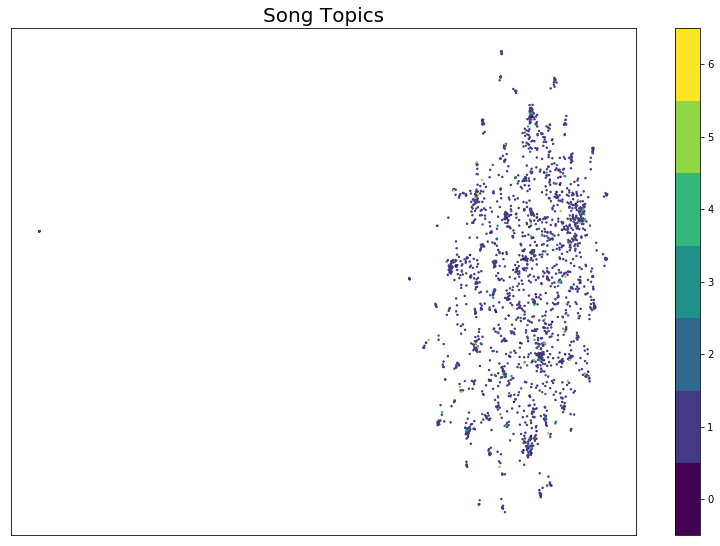

In [57]:
#TF-IDF matrix embedded in two dimensions by UMAP
df_emb_sample = df_emb.sample(2000)
fig, ax = plt.subplots(figsize=(14, 14/1.5))
plt.scatter(
    df_emb_sample["x"].values, df_emb_sample["y"].values, s=2, c=df_emb_sample["label"].values
)
plt.setp(ax, xticks=[], yticks=[])
colorbar = plt.colorbar(boundaries=np.arange(8)-0.5)
colorbar.set_ticks(np.arange(7))
plt.title("Song Topics", fontsize=20)
plt.show()

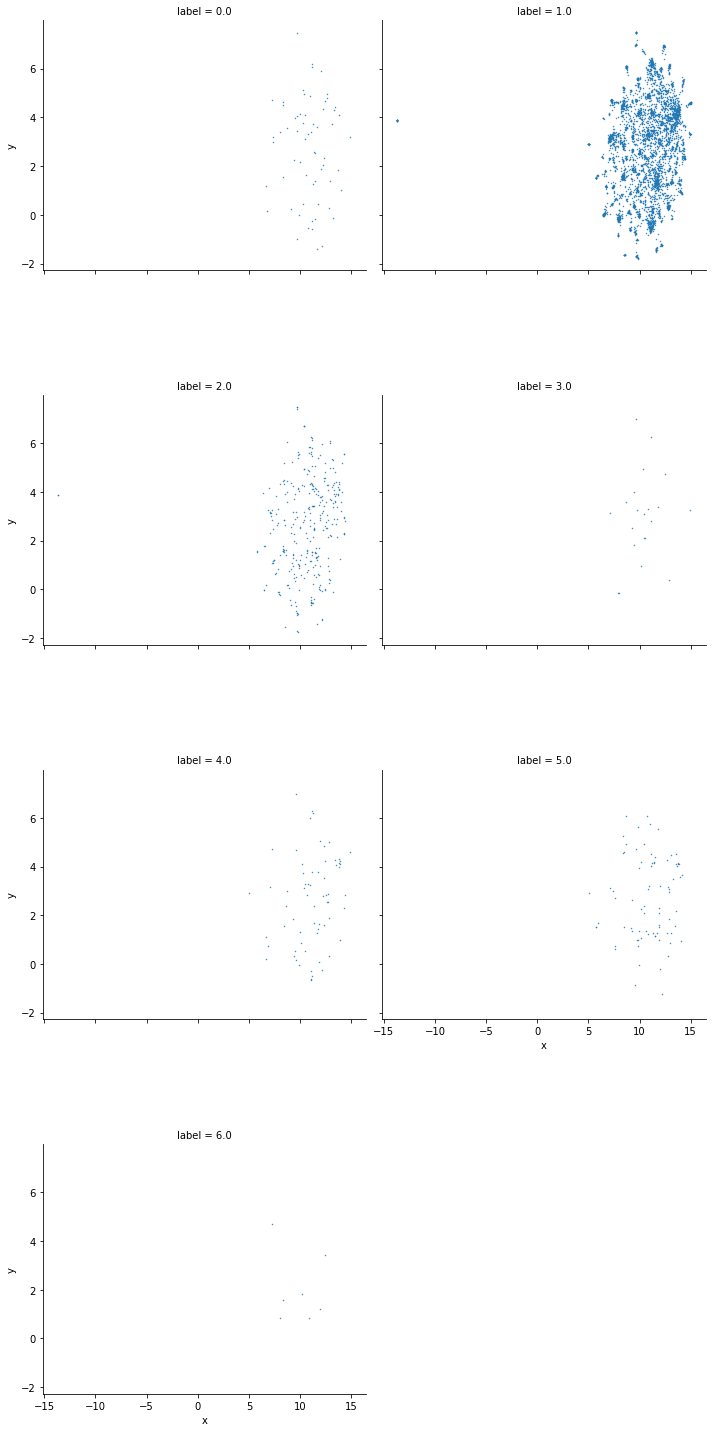

In [62]:
# see topics individually
g = sns.FacetGrid(df_emb, col="label", col_wrap=2, height=5, aspect=1)
g.map(plt.scatter, "x", "y", s=0.2).fig.subplots_adjust(wspace=.05, hspace=.5)

# 53% of songs fall into topic 1
#  '0.053*"know" + 0.052*"love" + 0.032*"baby" + 0.027*"want" + 0.020*"feel" + '
#  '0.020*"time" + 0.020*"never" + 0.018*"tell" + 0.018*"would" + '
#  '0.016*"think"'